<a href="https://colab.research.google.com/github/Rabiyakouser/ML_sentiment_analysis/blob/main/MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv.zip to IMDB Dataset.csv.zip


In [ ]:
df = pd.read_csv('IMDB Dataset.csv.zip')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
for i in range(5):
  print("Review: ",[i])
  print(df['review'].iloc[i], "\n")
  print("Sentiment: ",df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [ ]:
def no_of_words(text):
  words = text.split()
  word_count = len(words)
  return word_count

In [ ]:
df['word count'] = df['review'].apply(no_of_words)

In [ ]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


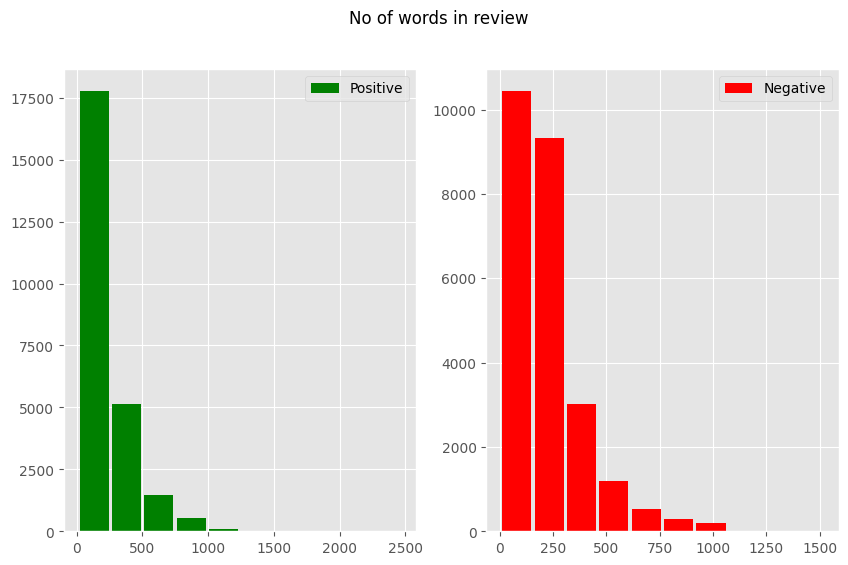

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='green', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("No of words in review")
plt.show()


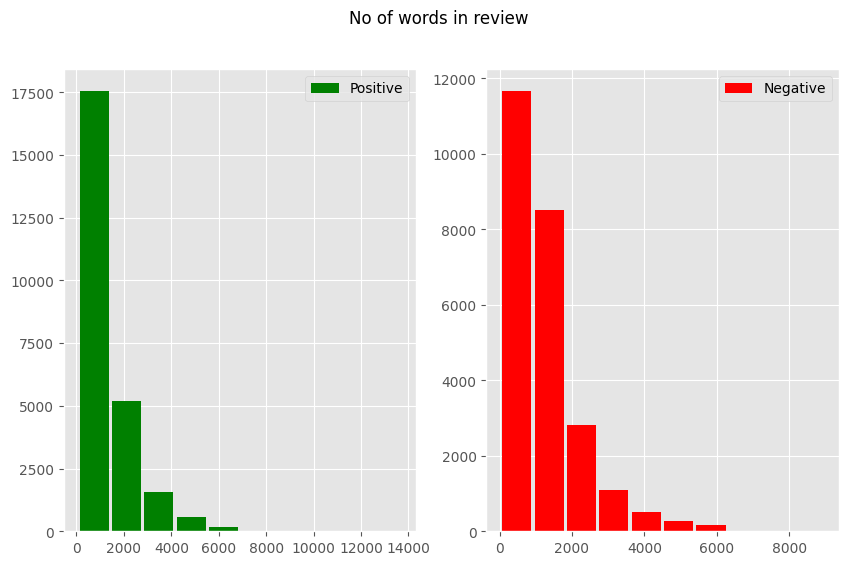

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='green', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("No of words in review")
plt.show()


In [ ]:
df.sentiment.replace("positive", 5, inplace = True)
df.sentiment.replace("negative", 1, inplace = True)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,5,307
1,A wonderful little production. <br /><br />The...,5,162
2,I thought this was a wonderful way to spend ti...,5,166
3,Basically there's a family where a little boy ...,1,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",5,230


In [ ]:
def data_processing(text):
  text = text.lower()
  text = re.sub('<br />', '',text)
  text = re.sub(r"https\S+|www\S+|https\S+", '', text, flags = re.MULTILINE)
  text = re.sub(r'\@w+|\#', ' ', text)
  text = re.sub(r'[^\w\s]', ' ', text)
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df.review = df ['review'].apply(data_processing)

In [ ]:
duplicated_count = df.duplicated().sum()
print("No of duplicates entries: ", duplicated_count)

No of duplicates entries:  421


In [ ]:
df = df.drop_duplicates('review')

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [ ]:
df.review = df['review'].apply(lambda x: stemming(x))

In [ ]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,5,163
1,wonderful little production filming technique ...,5,86
2,thought wonderful way spend time hot summer we...,5,85
3,basically family little boy jake thinks zombie...,1,66
4,petter mattei love time money visually stunnin...,5,125


In [ ]:
pos_reviews = df[df.sentiment == 5]
pos_reviews.head()

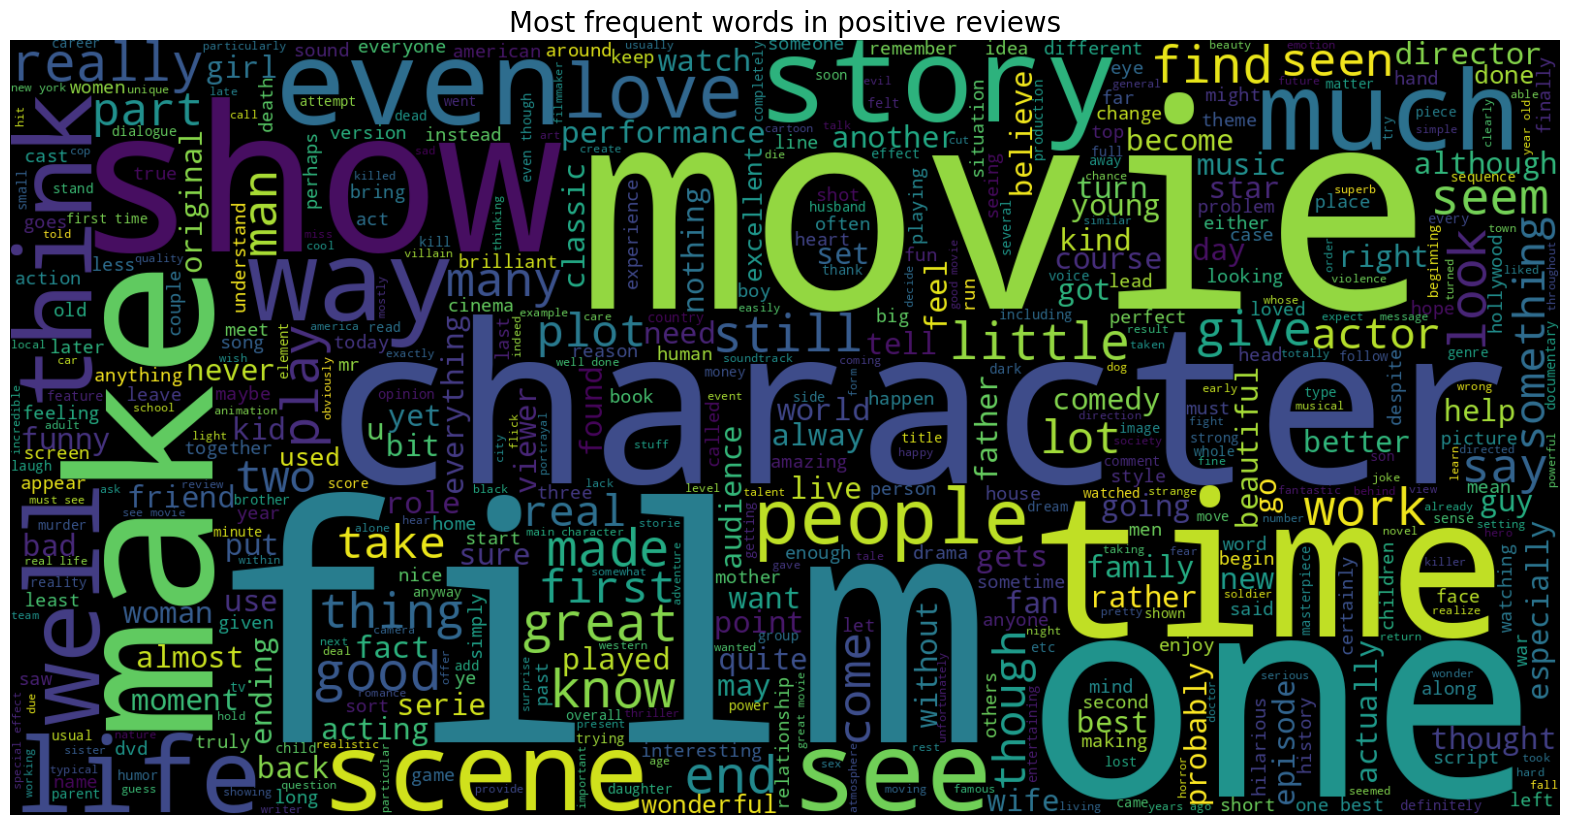

In [ ]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize = (20,15), facecolor = 'None')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 20)
plt.show()

In [ ]:
import numpy as np

In [ ]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
  for word in text.split():
    count[word] +=1
count.most_common(20)

[('film', 41947),
 ('movie', 37644),
 ('one', 27201),
 ('like', 17645),
 ('good', 14956),
 ('story', 12894),
 ('great', 12882),
 ('time', 12693),
 ('well', 12675),
 ('see', 12219),
 ('also', 10759),
 ('really', 10699),
 ('would', 10546),
 ('even', 9565),
 ('first', 9183),
 ('much', 9174),
 ('people', 8682),
 ('love', 8653),
 ('best', 8478),
 ('get', 8251)]

In [ ]:
pos_words = pd.DataFrame(count.most_common(20))
pos_words.columns = ['word','count']
pos_words.head()

,word,count
0,film,41947
1,movie,37644
2,one,27201
3,like,17645
4,good,14956


In [ ]:
px.bar(pos_words, x = 'count', y = 'word',title = 'common words in positive reviews', color = 'word')

In [ ]:
neg_reviews = df[df.sentiment == 5]
neg_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,5,163
1,wonderful little production filming technique ...,5,86
2,thought wonderful way spend time hot summer we...,5,85
4,petter mattei love time money visually stunnin...,5,125
5,probably time favorite movie story selflessnes...,5,56


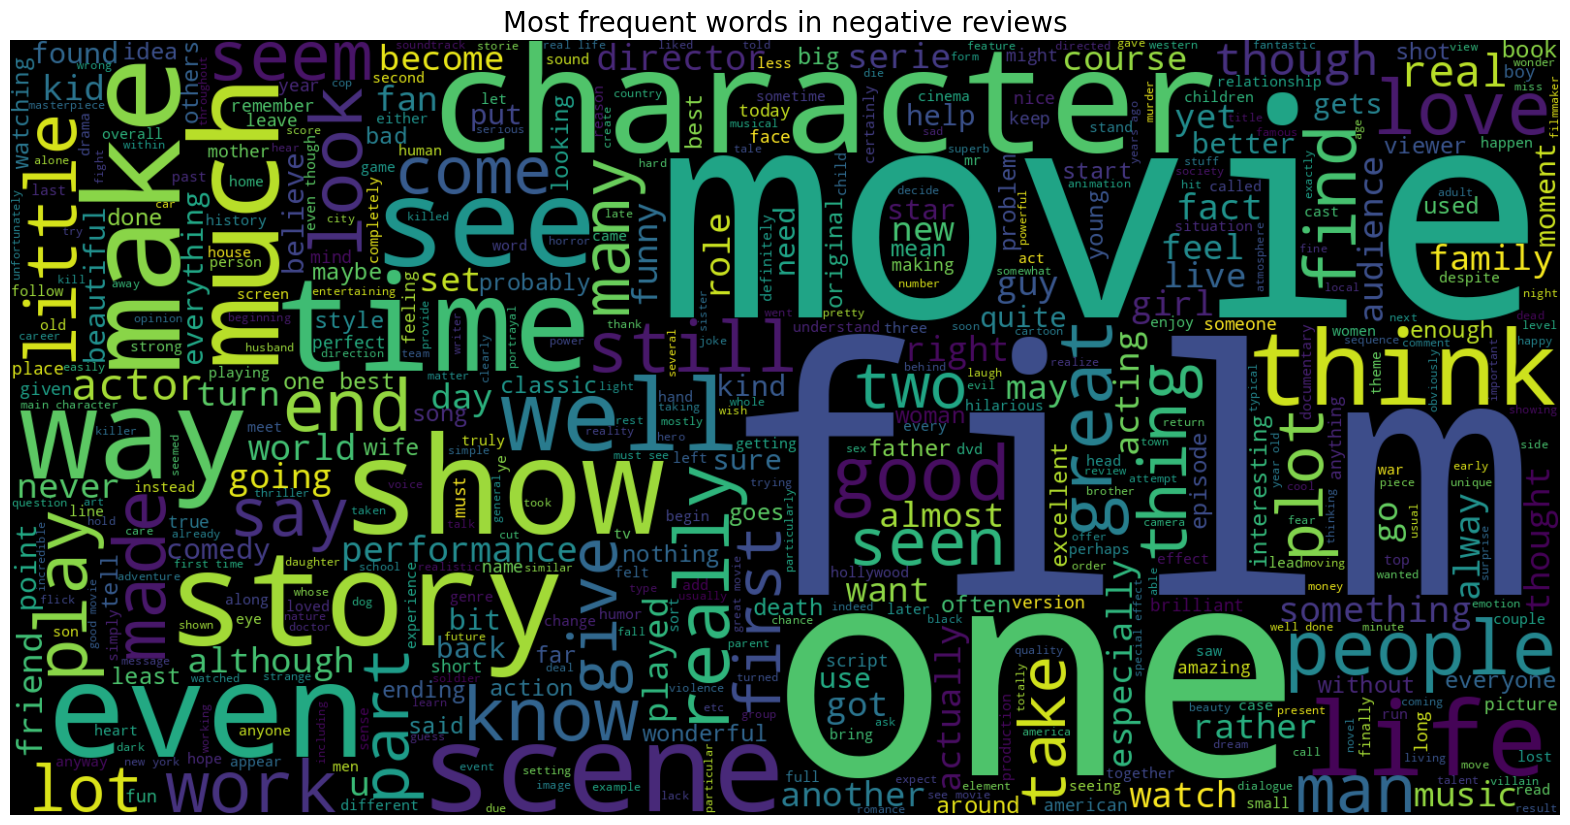

In [ ]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize = (20,15), facecolor = 'None')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 20)
plt.show()

In [ ]:
count = Counter()
for text in neg_reviews['review'].values:
  for word in text.split():
    count[word] +=1
count.most_common(20)

[('film', 41947),
 ('movie', 37644),
 ('one', 27201),
 ('like', 17645),
 ('good', 14956),
 ('story', 12894),
 ('great', 12882),
 ('time', 12693),
 ('well', 12675),
 ('see', 12219),
 ('also', 10759),
 ('really', 10699),
 ('would', 10546),
 ('even', 9565),
 ('first', 9183),
 ('much', 9174),
 ('people', 8682),
 ('love', 8653),
 ('best', 8478),
 ('get', 8251)]

In [ ]:
neg_words = pd.DataFrame(count.most_common(20))
neg_words.columns = ['word','count']
neg_words.head

<bound method NDFrame.head of       word  count
0     film  41947
1    movie  37644
2      one  27201
3     like  17645
4     good  14956
5    story  12894
6    great  12882
7     time  12693
8     well  12675
9      see  12219
10    also  10759
11  really  10699
12   would  10546
13    even   9565
14   first   9183
15    much   9174
16  people   8682
17    love   8653
18    best   8478
19     get   8251>

In [ ]:
px.bar(neg_words, x = 'count', y = 'word',title = 'common words in negative reviews', color = 'word')

In [ ]:
from tkinter.constants import Y
X = df['review']
Y = df['sentiment']

In [ ]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print("Size of X_train: ", (X_train.shape))
print("Size of Y_train: ", (Y_train.shape))
print("Size of X_test: ", (X_test.shape))
print("Size of Y_test: ", (Y_test.shape))

Size of X_train:  (34702, 103771)
Size of Y_train:  (34702,)
Size of X_test:  (14873, 103771)
Size of Y_test:  (14873,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logpreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logpreg_pred, Y_test)
print("Test accuracy: {:.2f}%",format(logreg_acc*100))

Test accuracy: {:.2f}% 89.5313655617562


In [ ]:
print(confusion_matrix(Y_test, logpreg_pred))
print("\n")
print(classification_report(Y_test, logpreg_pred))

[[6517  902]
 [ 655 6799]]


              precision    recall  f1-score   support

           1       0.91      0.88      0.89      7419
           5       0.88      0.91      0.90      7454

    accuracy                           0.90     14873
   macro avg       0.90      0.90      0.90     14873
weighted avg       0.90      0.90      0.90     14873



In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb_pred = mnb.predict(X_test)
mnb_acc = accuracy_score(mnb_pred, Y_test)
print("Test accuracy: {:.2f}%",format(mnb_acc*100))

Test accuracy: {:.2f}% 86.41161836885631


In [ ]:
print(confusion_matrix(Y_test, mnb_pred))
print("\n")
print(classification_report(Y_test, mnb_pred))

[[6459  960]
 [1061 6393]]


              precision    recall  f1-score   support

           1       0.86      0.87      0.86      7419
           5       0.87      0.86      0.86      7454

    accuracy                           0.86     14873
   macro avg       0.86      0.86      0.86     14873
weighted avg       0.86      0.86      0.86     14873



In [ ]:
svc = LinearSVC()
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, Y_test)
print("Test accuracy: {:.2f}%",format(svc_acc*100))

Test accuracy: {:.2f}% 89.26242183823035


In [ ]:
print(confusion_matrix(Y_test, svc_pred))
print("\n")
print(classification_report(Y_test, svc_pred))

[[6551  868]
 [ 729 6725]]


              precision    recall  f1-score   support

           1       0.90      0.88      0.89      7419
           5       0.89      0.90      0.89      7454

    accuracy                           0.89     14873
   macro avg       0.89      0.89      0.89     14873
weighted avg       0.89      0.89      0.89     14873



In [ ]:
 from sklearn.model_selection import GridSearchCV
 param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
 grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
 grid.fit(X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.881 total time=   0.2s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.882 total time=   0.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.1s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.876 total time=   0.2s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.2s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.3s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.4s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.896 total time=   0.3s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.3s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.3s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.894 total time=   0.8s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [ ]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [ ]:
svc = LinearSVC(C = 1, loss = 'hinge')
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, Y_test)
print("Test accuracy: {:.2f}%",format(svc_acc*100))

Test accuracy: {:.2f}% 89.7196261682243


In [ ]:
print(confusion_matrix(Y_test, svc_pred))
print("\n")
print(classification_report(Y_test, svc_pred))

[[6584  835]
 [ 694 6760]]


              precision    recall  f1-score   support

           1       0.90      0.89      0.90      7419
           5       0.89      0.91      0.90      7454

    accuracy                           0.90     14873
   macro avg       0.90      0.90      0.90     14873
weighted avg       0.90      0.90      0.90     14873

